<a href="https://colab.research.google.com/github/pradyumna4998/Intro-to-ML/blob/main/Intro_to_ML_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Machine Learning

Homework 6

Name : V.pradyumna

Student ID : 801345963

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.metrics import classification_report

In [ ]:
url ='https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/Housing.csv'
dataFrames = pd.read_csv(url)
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames['furnishingstatus'].value_counts().unique
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataFrames = pd.get_dummies(dataFrames, columns=['furnishingstatus'], drop_first=False)
dataFrames = dataFrames.drop('furnishingstatus_semi-furnished', axis=1)
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,1,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,0,0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,1,0


In [ ]:
binary_columns = dataFrames.select_dtypes(include=['object']).columns
binary_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [ ]:
dataFrames[binary_columns] = dataFrames[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))
dataFrames.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


In [ ]:
dataFrames.shape

(545, 14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x_scaled = MinMaxScaler()
y_scaled = MinMaxScaler()

In [ ]:
X = dataFrames.drop('price', axis = 1)
y = dataFrames[['price']]

In [ ]:
X = pd.DataFrame(x_scaled.fit_transform(X), columns=X.columns, index=X.index).values
y = pd.DataFrame(y_scaled.fit_transform(y), columns=y.columns, index=y.index).values

In [ ]:
X_training, X_testing, Y_training, Y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
training_X = torch.tensor(X_training)
training_y =  torch.tensor(Y_training)
testing_X =  torch.tensor(X_testing)
testing_y=  torch.tensor(Y_testing)

In [ ]:
dataTraining = TensorDataset(training_X, training_y)
loading_trainSet = DataLoader(dataTraining, batch_size=32, shuffle=True)

In [ ]:
dataTesting = TensorDataset(testing_X, testing_y)
loading_testSet = DataLoader(dataTesting, batch_size=32)

In [ ]:
def model_train(model, criterion, optimizer, epochs, loading_trainSet, testing_X, testing_y):
    training_Loss = []
    testing_Loss = []
    for epoch in range(epochs + 1):
        # Training
        model.train()
        for inputs, targets in loading_trainSet:
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, targets)
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        with torch.no_grad():
            output_test = model(testing_X)
            testing_loss = criterion(output_test, testing_y)
            if epoch % 500 == 0:
              print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Testing Loss: {testing_loss.item()}')
              testing_Loss.append(testing_loss)
              training_Loss.append(loss)
    return training_Loss, testing_Loss

Problem:1)A

In [ ]:
# Model 1
modelFirst = nn.Sequential(nn.Linear(training_X.shape[1], 32),nn.Tanh(),nn.Linear(32, 1)).to(torch.float64)
optimizerFirst = optim.SGD(modelFirst.parameters(), lr=0.02)
training_loss, testing_loss = model_train(modelFirst, nn.MSELoss(), optimizerFirst, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.01712257228880188, Testing Loss: 0.042327766656289685
Epoch 500/5000, Training Loss: 0.0050117547806131915, Testing Loss: 0.013205343653145657
Epoch 1000/5000, Training Loss: 0.008346930914050149, Testing Loss: 0.013220898442566917
Epoch 1500/5000, Training Loss: 0.005725685531291362, Testing Loss: 0.013389297461568125
Epoch 2000/5000, Training Loss: 0.003418119939921166, Testing Loss: 0.013096622964831823
Epoch 2500/5000, Training Loss: 0.0048418542181646994, Testing Loss: 0.013274659852418465
Epoch 3000/5000, Training Loss: 0.006943797474779884, Testing Loss: 0.013159316061528988
Epoch 3500/5000, Training Loss: 0.005845645454744049, Testing Loss: 0.013620824860706244
Epoch 4000/5000, Training Loss: 0.005528219526809766, Testing Loss: 0.013405194916417838
Epoch 4500/5000, Training Loss: 0.008361273831123454, Testing Loss: 0.013458284921138266
Epoch 5000/5000, Training Loss: 0.0021617377180102484, Testing Loss: 0.013760948298418835


In [ ]:
for name, param in modelFirst.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([1, 32])
Parameter name: 2.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters = sum(p.numel() for p in modelFirst.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  481 



In [ ]:
epochs = range(0, 5001, 500)

<ipython-input-19-90261889885b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


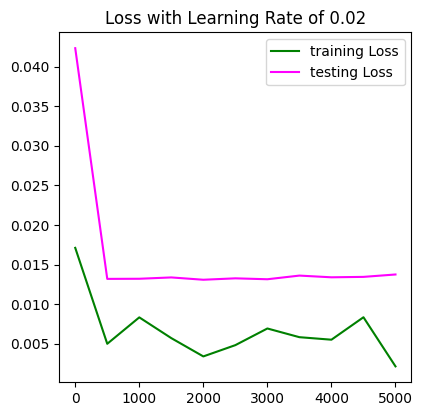

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_loss]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_loss]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()

Problem:1)b

In [ ]:
modelSec = nn.Sequential(nn.Linear(training_X.shape[1], 32),
    nn.Tanh(),
    nn.Linear(32, 64),# Second hidden layer with 64 neurons
    nn.Tanh(),
    nn.Linear(64, 16), # Third hidden layer with 16 neurons
    nn.Tanh(),
    nn.Linear(16, 1) # Output layer with 1 neuron
).to(torch.float64)
criteria = nn.MSELoss()
optimizerSec = optim.SGD(modelSec.parameters(), lr=0.02)
training_lossSec, testing_lossSec = model_train(modelSec, nn.MSELoss(), optimizerSec, 5000, loading_trainSet, testing_X, testing_y)

Epoch 0/5000, Training Loss: 0.030584940087731494, Testing Loss: 0.04189088718784682
Epoch 500/5000, Training Loss: 0.01367502639738534, Testing Loss: 0.013164546172538438
Epoch 1000/5000, Training Loss: 0.005520714372276683, Testing Loss: 0.0131326484872513
Epoch 1500/5000, Training Loss: 0.0039994443665933395, Testing Loss: 0.013239504803569824
Epoch 2000/5000, Training Loss: 0.010352629974759237, Testing Loss: 0.012986632029778454
Epoch 2500/5000, Training Loss: 0.017336689762958872, Testing Loss: 0.012874119593696552
Epoch 3000/5000, Training Loss: 0.005363056540732705, Testing Loss: 0.013237988432863319
Epoch 3500/5000, Training Loss: 0.01150116124210378, Testing Loss: 0.012897193980578378
Epoch 4000/5000, Training Loss: 0.010200137474473842, Testing Loss: 0.01310576022544024
Epoch 4500/5000, Training Loss: 0.004867530277036013, Testing Loss: 0.013067185600428834
Epoch 5000/5000, Training Loss: 0.0066149182537743375, Testing Loss: 0.013429276909375423


In [ ]:
for name, param in modelSec.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}")

Parameter name: 0.weight, Shape: torch.Size([32, 13])
Parameter name: 0.bias, Shape: torch.Size([32])
Parameter name: 2.weight, Shape: torch.Size([64, 32])
Parameter name: 2.bias, Shape: torch.Size([64])
Parameter name: 4.weight, Shape: torch.Size([16, 64])
Parameter name: 4.bias, Shape: torch.Size([16])
Parameter name: 6.weight, Shape: torch.Size([1, 16])
Parameter name: 6.bias, Shape: torch.Size([1])


In [ ]:
total_no_of_parameters= sum(p.numel() for p in modelSec.parameters() if p.requires_grad)
print("Total number of parameters that is trained ", total_no_of_parameters,  '\n')

Total number of parameters that is trained  3617 



<ipython-input-23-03913a257f10>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


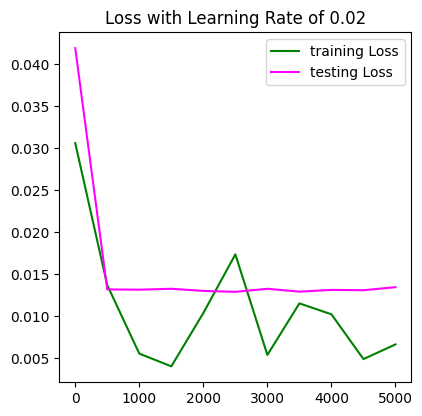

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Loss for optimizer - SGD')

plt.subplot(2,2,1)
plt.plot(epochs, np.array([item.detach().item() for item in training_lossSec]), color='green', label = 'training Loss')
plt.plot(epochs, np.array([item.detach().item() for item in testing_lossSec]), color='magenta', label = 'testing Loss')
plt.title('Loss with Learning Rate of 0.02')
plt.legend()

plt.show()


In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.1 MB/s eta 0:00:00
time: 240 µs (started: 2023-12-02 02:08:13 +00:00)


problem 2A

In [22]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [23]:
from google.colab import drive
import pandas as pd
file_path = 'https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/cancer.csv'
df = pd.read_csv(file_path)


Epoch 1/100, Train Loss: 0.6750, Validation Loss: 0.6069, Acc: 81.58%
Epoch 2/100, Train Loss: 0.5843, Validation Loss: 0.5279, Acc: 95.61%
Epoch 3/100, Train Loss: 0.5099, Validation Loss: 0.4556, Acc: 97.37%
Epoch 4/100, Train Loss: 0.4432, Validation Loss: 0.3930, Acc: 98.25%
Epoch 5/100, Train Loss: 0.3848, Validation Loss: 0.3408, Acc: 98.25%
Epoch 6/100, Train Loss: 0.3358, Validation Loss: 0.2959, Acc: 98.25%
Epoch 7/100, Train Loss: 0.2945, Validation Loss: 0.2582, Acc: 98.25%
Epoch 8/100, Train Loss: 0.2603, Validation Loss: 0.2278, Acc: 98.25%
Epoch 9/100, Train Loss: 0.2322, Validation Loss: 0.2022, Acc: 98.25%
Epoch 10/100, Train Loss: 0.2093, Validation Loss: 0.1816, Acc: 98.25%
Epoch 11/100, Train Loss: 0.1903, Validation Loss: 0.1644, Acc: 98.25%
Epoch 12/100, Train Loss: 0.1750, Validation Loss: 0.1506, Acc: 98.25%
Epoch 13/100, Train Loss: 0.1623, Validation Loss: 0.1390, Acc: 98.25%
Epoch 14/100, Train Loss: 0.1513, Validation Loss: 0.1292, Acc: 98.25%
Epoch 15/100, T

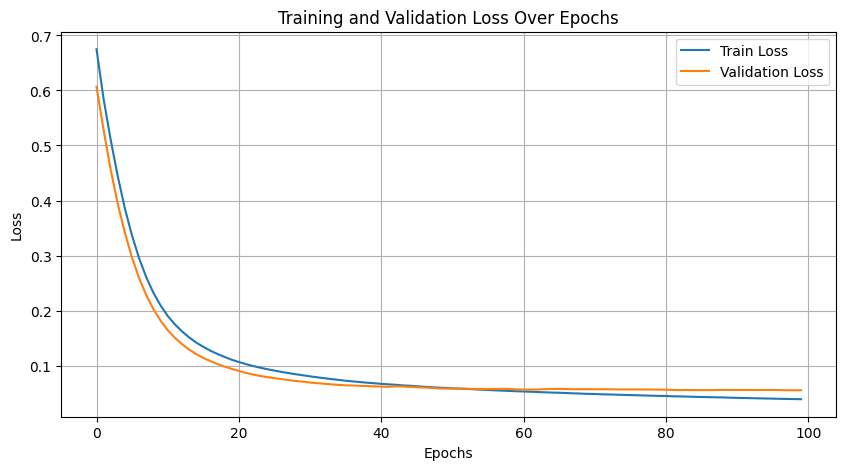

In [24]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1).values  # Drop 'id' and 'Unnamed: 32' as they are not features
y = df['diagnosis'].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for both train and validation sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the neural network with one hidden layer
class CancerNet(nn.Module):
    def __init__(self):
        super(CancerNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize the model, loss function, and optimizer
model = CancerNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                predicted = outputs.round()
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)
        accuracy = 100 * correct / total

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Acc: {accuracy:.2f}%')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return train_losses, val_losses, training_time

# Run training
epochs = 100
train_losses, val_losses, training_time = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Assuming the final train_losses, val_losses, and training_time are already available from train_model

# Calculate final training and validation loss
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]

# Calculate final validation accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        predicted = outputs.round()  # Since sigmoid outputs a probability, we round to get the binary classification
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

final_accuracy = 100 * correct / total

# Print the required results
print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Validation Accuracy: {final_accuracy:.2f}%")


Total Training Time: 2.30 seconds
Final Training Loss: 0.0388
Final Validation Loss: 0.0552
Validation Accuracy: 98.25%


Problem 2B:

In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from google.colab import drive
import pandas as pd
file_path = 'https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/cancer.csv'
df = pd.read_csv(file_path)


Initial data preview:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  

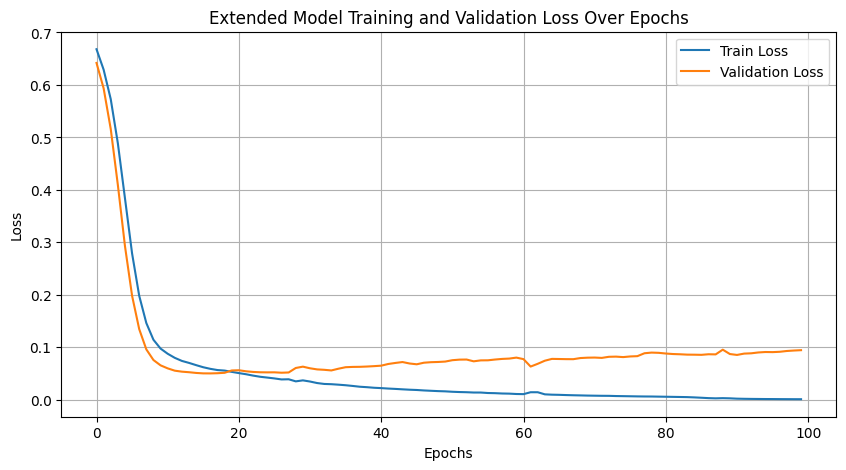

Total Training Time for Extended Model: 2.42 seconds
Final Extended Model Training Loss: 0.0012
Final Extended Model Validation Loss: 0.0947
Validation Accuracy: 98.25%


In [5]:
# Inspect the initial data
print("Initial data preview:", df.head())
print("Column names:", df.columns.tolist())

# Drop the 'Unnamed: 32' column (contains NaN)
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)

# Convert 'diagnosis' to binary labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values and confirm data integrity
print("Missing values per column:\n", df.isnull().sum())

# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values  # Drop 'id' and 'diagnosis' columns
y = df['diagnosis'].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for both train and validation sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the extended neural network model with additional hidden layers
class ExtendedCancerNet(nn.Module):
    def __init__(self):
        super(ExtendedCancerNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 64)  # Additional hidden layer
        self.fc3 = nn.Linear(64, 16)  # Additional hidden layer
        self.fc4 = nn.Linear(16, 1)   # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize the extended model, loss function, and optimizer
model = ExtendedCancerNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function with validation accuracy calculation
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []
    final_accuracy = 0  # Initialize final accuracy

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                predicted = outputs.round()
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)
        final_accuracy = 100 * correct / total

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Acc: {final_accuracy:.2f}%')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return train_losses, val_losses, training_time, final_accuracy

# Run training
epochs = 100
train_losses, val_losses, training_time, final_accuracy = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Extended Model Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final results
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
print(f"Total Training Time for Extended Model: {training_time:.2f} seconds")
print(f"Final Extended Model Training Loss: {final_train_loss:.4f}")
print(f"Final Extended Model Validation Loss: {final_val_loss:.4f}")
print(f"Validation Accuracy: {final_accuracy:.2f}%")


*Problem*:3A

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/100], Loss: 1.6410
Epoch [2/100], Loss: 1.4482
Epoch [3/100], Loss: 1.3639
Epoch [4/100], Loss: 1.2974
Epoch [5/100], Loss: 1.2394
Epoch [6/100], Loss: 1.1888
Epoch [7/100], Loss: 1.1305
Epoch [8/100], Loss: 1.0907
Epoch [9/100], Loss: 1.0468
Epoch [10/100], Loss: 1.0046
Epoch [11/100], Loss: 0.9637
Epoch [12/100], Loss: 0.9301
Epoch [13/100], Loss: 0.8898
Epoch [14/100], Loss: 0.8545
Epoch [15/100], Loss: 0.8239
Epoch [16/100], Loss: 0.7908
Epoch [17/100], Loss: 0.7629
Epoch [18/100], Loss: 0.7243
Epoch [19/100], Loss: 0.7077
Epoch [20/100], Loss: 0.6747
Epoch [21/100], Loss: 0.6516
Epoch [22/100], Loss: 0.6423
Epoch [23/100], Loss: 0.6136
Epoch [24/100], Loss: 0.5990
Epoch [25/100], Loss: 0.5772
Epoch [26/100], Loss: 0.5526
Epoch [28/100], Loss: 0.5226
Epoch [29/100], Loss: 0.5079
Epoch [30/100], Loss: 0.4825
Epoch [31/100], Loss: 0.4762
Epoch [32/100], Loss: 0.4576
Epoch [33/100], Loss: 0.4541
Epoch

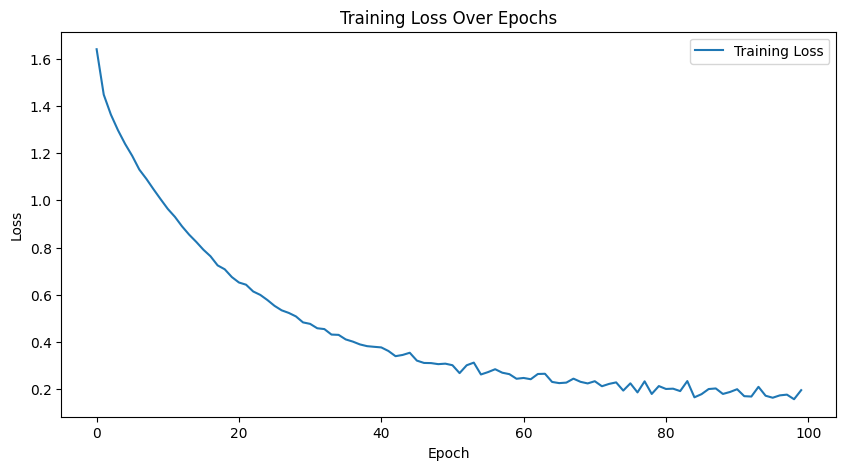

Accuracy on test set: 49.97%
Final Training Loss: 0.1951
Evaluation Accuracy: 49.97%


In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 data loading and transforming
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Neural network architecture
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model initialization
model = CIFAR10Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(num_epochs):
    model.train()
    start_time = time.time()
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(trainloader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Total training time: {training_time:.2f} seconds')
    return losses, training_time

# Evaluate the model
def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Train the network
losses, training_time = train_model(100)

# Plot training losses
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the network
accuracy = evaluate_model()
print(f'Accuracy on test set: {accuracy:.2f}%')

# Print final outputs required for the assignment
print(f'Final Training Loss: {losses[-1]:.4f}')
print(f'Evaluation Accuracy: {accuracy:.2f}%')


Problem 3b

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.6862
Epoch 2, Loss: 1.4537
Epoch 3, Loss: 1.3363
Epoch 4, Loss: 1.2392
Epoch 5, Loss: 1.1561
Epoch 6, Loss: 1.0754
Epoch 7, Loss: 1.0024
Epoch 8, Loss: 0.9332
Epoch 9, Loss: 0.8603
Epoch 10, Loss: 0.7975
Epoch 11, Loss: 0.7410
Epoch 12, Loss: 0.6789
Epoch 13, Loss: 0.6413
Epoch 14, Loss: 0.5854
Epoch 15, Loss: 0.5466
Epoch 16, Loss: 0.5096
Epoch 17, Loss: 0.4747
Epoch 18, Loss: 0.4489
Epoch 19, Loss: 0.4179
Epoch 20, Loss: 0.3933
Epoch 21, Loss: 0.3727
Epoch 22, Loss: 0.3588
Epoch 23, Loss: 0.3366
Epoch 24, Loss: 0.3279
Epoch 25, Loss: 0.3093
Epoch 26, Loss: 0.2964
Epoch 27, Loss: 0.2904
Epoch 28, Loss: 0.2758
Epoch 29, Loss: 0.2614
Epoch 30, Loss: 0.2599
Epoch 31, Loss: 0.2355
Epoch 32, Loss: 0.2426
Epoch 33, Loss: 0.2288
Epoch 34, Loss: 0.2213
Epoch 35, Loss: 0.2184
Epoch 36, Loss: 0.2150
Epoch 37, Loss: 0.1982
Epoch 38, Loss: 0.2056
Epoch 39, Loss: 0.1968
Epoch 40, Loss: 0.1984
Epoch 41, Los

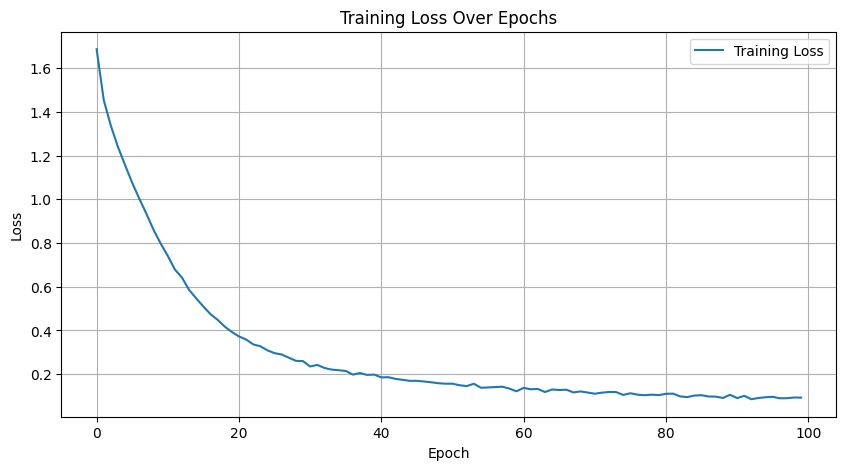

Accuracy on the test set: 53.19%
Final Training Loss: 0.0932
Training Time: 3683.77 seconds
Evaluation Accuracy: 53.19%


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 data loading and transforming
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Neural network architecture with additional hidden layers
class ExtendedCIFAR10Net(nn.Module):
    def __init__(self):
        super(ExtendedCIFAR10Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)  # Additional hidden layer
        self.fc4 = nn.Linear(128, 64)   # Additional hidden layer
        self.fc5 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Model initialization
model = ExtendedCIFAR10Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the network
def train_model(num_epochs):
    start_time = time.time()
    training_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        training_losses.append(running_loss / len(trainloader))
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.4f}')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return training_losses, training_time

# Train the network
training_losses, training_time = train_model(100)

# Plot training losses
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Function to evaluate the network accuracy
def evaluate_network():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

# Evaluate the network
accuracy = evaluate_network()
print(f'Final Training Loss: {training_losses[-1]:.4f}')
print(f'Training Time: {training_time:.2f} seconds')
print(f'Evaluation Accuracy: {accuracy:.2f}%')
